# Running NLP algorithms on 5,000 text messages.

In [15]:
import pandas as pd

In [16]:
with open('smsspamcollection/readme', encoding="ISO-8859-1") as readme:
    for line in readme.readlines():
        print(line)

SMS Spam Collection v.1

-------------------------



1. DESCRIPTION

--------------



The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. 



1.1. Compilation

----------------



This corpus has been collected from free or free for research sources at the Web:



- A collection of between 425 SMS spam messages extracted manually from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: http://www.grumbletext.co.uk/

- A list of 450 SMS ham messages collected from Caroline Tag's PhD The

In [21]:
with open('smsspamcollection/SMSSpamCollection', encoding='ISO-8859-1') as dataset:
    messages = [line.rstrip() for line in dataset.readlines()]

Number of messaages

In [22]:
len(messages)

5574

In [24]:
for index, message in enumerate(messages[:10]):
    print(index, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [25]:
df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [26]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [27]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [30]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [34]:
df['length'] = df['message'].apply(len)

In [57]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [83]:
df[df['length'] == df['length'].nlargest().iloc[0]]['message'].iloc[0]
# The poor guy dude. 

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

# Data Visualization

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

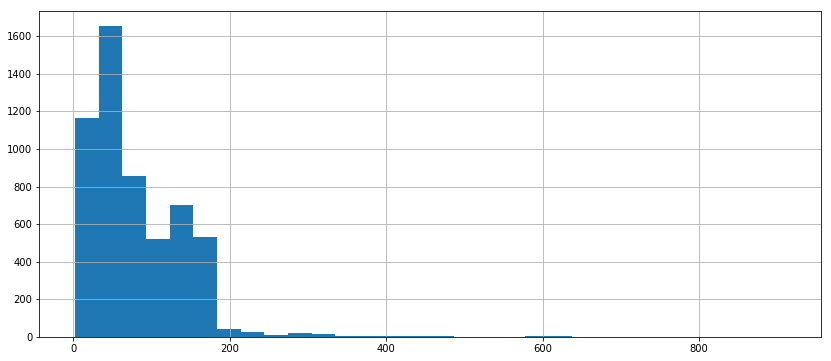

In [85]:
plt.figure(figsize=(14, 6))
df['length'].hist(bins=30)

/home/guyandtheworld/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


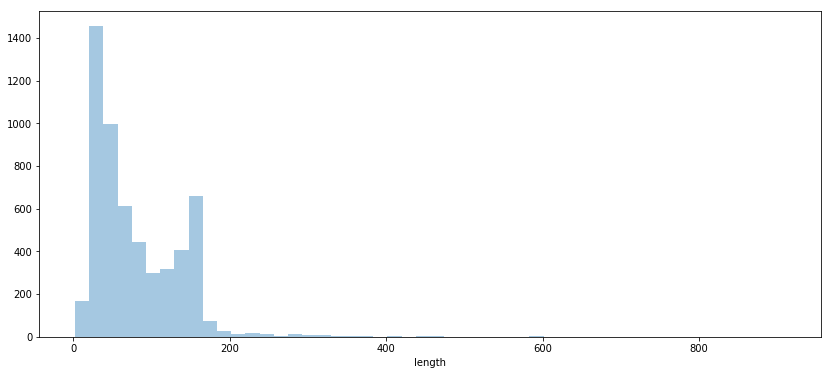

In [86]:
plt.figure(figsize=(14, 6))
sns.distplot(df['length'], kde=False)

Plotting the length with hue as the label

/home/guyandtheworld/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/guyandtheworld/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


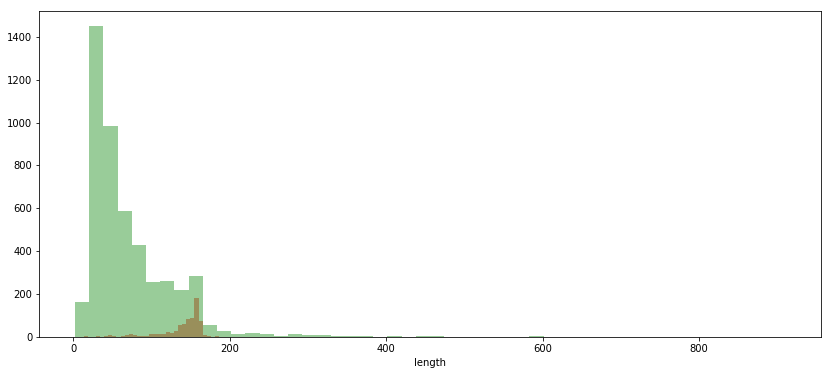

In [87]:
plt.figure(figsize=(14, 6))
sns.distplot(df[df['label']=='spam']['length'], kde=False, color='red')
sns.distplot(df[df['label']=='ham']['length'], kde=False, color='green')

In [88]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

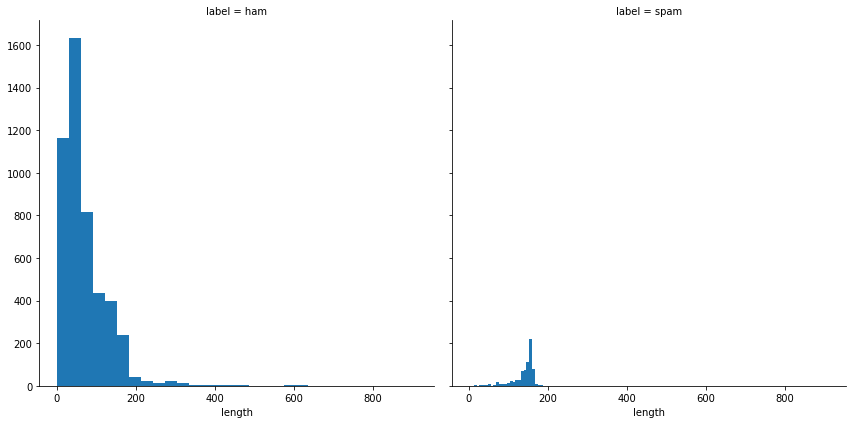

In [89]:
g = sns.FacetGrid(df, col='label', size=6)
g.map(plt.hist, 'length', bins=30)

Here we can see that there is a strong correlation between the length of the string and whether it is a spam message or not

# Text Preprocessing

Removing the punctuations and the very common words.

In [97]:
import string
from nltk.corpus import stopwords

In [109]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [111]:
df['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [112]:
from sklearn.feature_extraction.text import CountVectorizer

In [113]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

In [116]:
len(bow_transformer.vocabulary_)

11425

In [125]:
message4 = df['message'][4]
message4

"Nah I don't think he goes to usf, he lives around here though"

In [126]:
bbb = bow_transformer.transform([message4])

In [127]:
print(bbb)

  (0, 2948)	1
  (0, 4777)	1
  (0, 6123)	1
  (0, 6877)	1
  (0, 7842)	1
  (0, 10433)	1
  (0, 10450)	1
  (0, 10799)	1


In [129]:
message_bow = bow_transformer.transform(df['message'])

In [132]:
message_bow.nnz

50548

Non-zero occurance

In [139]:
100* message_bow.nnz / (message_bow.shape[0] * message_bow.shape[1])

0.07940295412668218

TD-IDF on words of the corpus

In [140]:
from sklearn.feature_extraction.text import TfidfTransformer

In [146]:
tfidf_transformer = TfidfTransformer().fit(message_bow)
tfidf4 = tfidf_transformer.transform(bbb)

In [150]:
df['message'].apply(text_process)[4]

['Nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though']

In [145]:
print(tfidf4)

  (0, 10799)	0.4019015462543087
  (0, 10450)	0.35407004444444734
  (0, 10433)	0.27043580251222216
  (0, 7842)	0.4457437273623316
  (0, 6877)	0.35407004444444734
  (0, 6123)	0.24090226292109554
  (0, 4777)	0.3104226271508041
  (0, 2948)	0.4019015462543087


In [154]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]
tfidf_transformer.idf_[bow_transformer.vocabulary_['unintentionally']]
tfidf_transformer.idf_[bow_transformer.vocabulary_['understood']]

8.239394426449646

In [155]:
messages_tdidf = tfidf_transformer.transform(message_bow)

In [160]:
messages_tdidf.shape

(5572, 11425)

In [168]:
messages_tdidf[0]

(1, 11425)

## Training a model

In [159]:
from sklearn.naive_bayes import MultinomialNB

In [169]:
model = MultinomialNB().fit(messages_tdidf, df['label'])

In [170]:
print('predicted:', model.predict(tfidf4)[0])
print('expected:', df.label[3])

predicted: ham
expected: ham


## Model Evaluation 

In [171]:
predictions = model.predict(messages_tdidf)

In [172]:
print(len(predictions))

5572


In [173]:
from sklearn.metrics import classification_report

In [176]:
print(classification_report(df['label'], predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



## Train Test Split

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
msg_train, msg_test, label_train, label_test = train_test_split(df['message'], df['label'], test_size=0.2)

In [179]:
print(len(msg_train), len(msg_test))

4457 1115


In [186]:
from sklearn.pipeline import Pipeline

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tdidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())
])

In [189]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7f59af111510>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [190]:
predictions = pipeline.predict(msg_test)

In [191]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.98       955
       spam       0.97      0.81      0.88       160

avg / total       0.97      0.97      0.97      1115

